In [2]:
import matplotlib.pyplot as plt
import pandas as pd
plt.close('all')
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
directory = 'results/notebooks/rl_caching_strategy_only/caching_strategy'

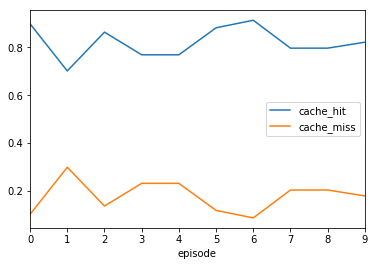

In [9]:
stats_df = pd.read_csv(f'{directory}/stats.txt', names=['timestamp', 'key', 'cache_hit', 'cache_miss', 'episode'])
stats_df['timestamp'] = pd.to_datetime(stats_df['timestamp'], unit='s')
stats_df = stats_df.set_index('timestamp')
cache_hit_ratio = stats_df['cache_hit'].sum()/stats_df['cache_hit'].count()
cache_miss_ratio = stats_df['cache_miss'].sum()/stats_df['cache_miss'].count()
stats_df.head(3)
# stats_df.resample('30S').mean().plot()
stats_df.groupby('episode').mean().plot()


Text(0.5, 0, 'episode')

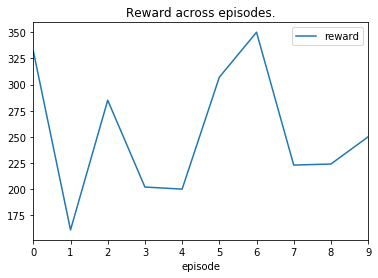

In [18]:
# Useful to compare various RL architecture 
episode_reward_df = pd.read_csv(f'{directory}/episode_rewards.txt',
                 names=['reward'])

ax = episode_reward_df.plot(title='Reward across episodes.')
ax.set_xlabel("episode")
# TODO allow multiple runs
# mean = episode_reward_df.mean()
# errors = episode_reward_df.std()
# fig, ax = plt.subplots()
# mean.plot.bar(yerr=errors, ax=ax, capsize=4)


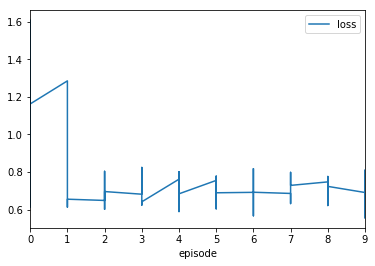

In [27]:
losses_df = pd.read_csv(f'{directory}/losses.txt', names=['episode','loss'], index_col='episode')
losses_df.plot(y='loss')


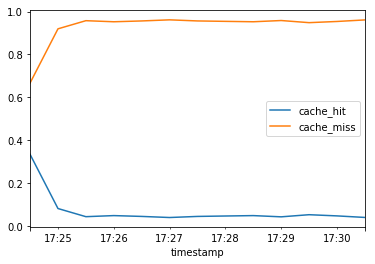

In [51]:
# stats_df = pd.read_csv('results/rl_caching_strategy_only/2019_04_11_18_23/caching_strategy/stats_episode_0.txt', 
#                        names=['timestamp', 'key', 'cache_hit', 'cache_miss'])
# stats_df['timestamp'] = pd.to_datetime(stats_df['timestamp'], unit='s')
# stats_df = stats_df.set_index('timestamp')
# stats_df.head(3)
# stats_df.resample('30S').mean().plot()